In [2]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd
from astropy.constants import pc, c, e
from astropy.table import Table, join, vstack

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


C:\Users\ksn70\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
import spectools_ir
spectools_ir.__file__

'C:\\Users\\ksn70\\python\\lib\\site-packages\\spectools_ir\\__init__.py'

In [4]:
hitran_data=extract_hitran_data('CO',4.649,5.101,isotopologue_number=2,vup=1)

In [5]:
infile='C:\\Users\\ksn70\\mypy\\rawdata\\nirspec_drtau.dat'

wave , flux = np.loadtxt(infile, unpack=True, skiprows=21)
print(wave,flux)

[4.6492472 4.6493402 4.6494331 ... 5.0999174 5.1000195 5.1001215] [1.3894759 1.5901209 1.7907699 ...       nan       nan       nan]


In [6]:
#calculate doppler shifted wavelength
v_dop_test=26.
wave_test=hitran_data['wave']*(1+v_dop_test*1000/c.value)

Text(0, 0.5, 'Flux [Jy]')

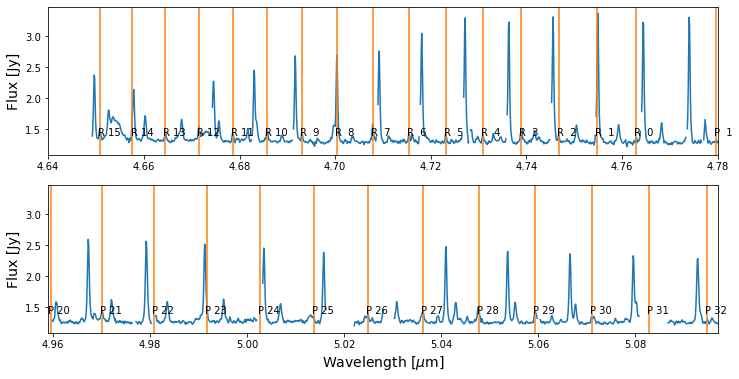

In [12]:
#Plot spectrum.
#The wavelength gap between the two plots is due to a section of poor atmosphere observations

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(211)
ax1.plot(wave,flux)
ax1.set_xlim(4.64,4.78) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.64) & (mywave<4.78) ):
        ax1.axvline(mywave,color='C1')
        ax1.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax1.set_ylabel('Flux [Jy]',fontsize=14)

ax2=fig.add_subplot(212)
ax2.plot(wave,flux)
ax2.set_xlim(4.959,5.097) #second half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.959) & (mywave<5.097) ):
        ax2.axvline(mywave,color='C1')
        ax2.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=14)
ax2.set_ylabel('Flux [Jy]',fontsize=14)

Text(0, 0.5, 'Flux [Jy]')

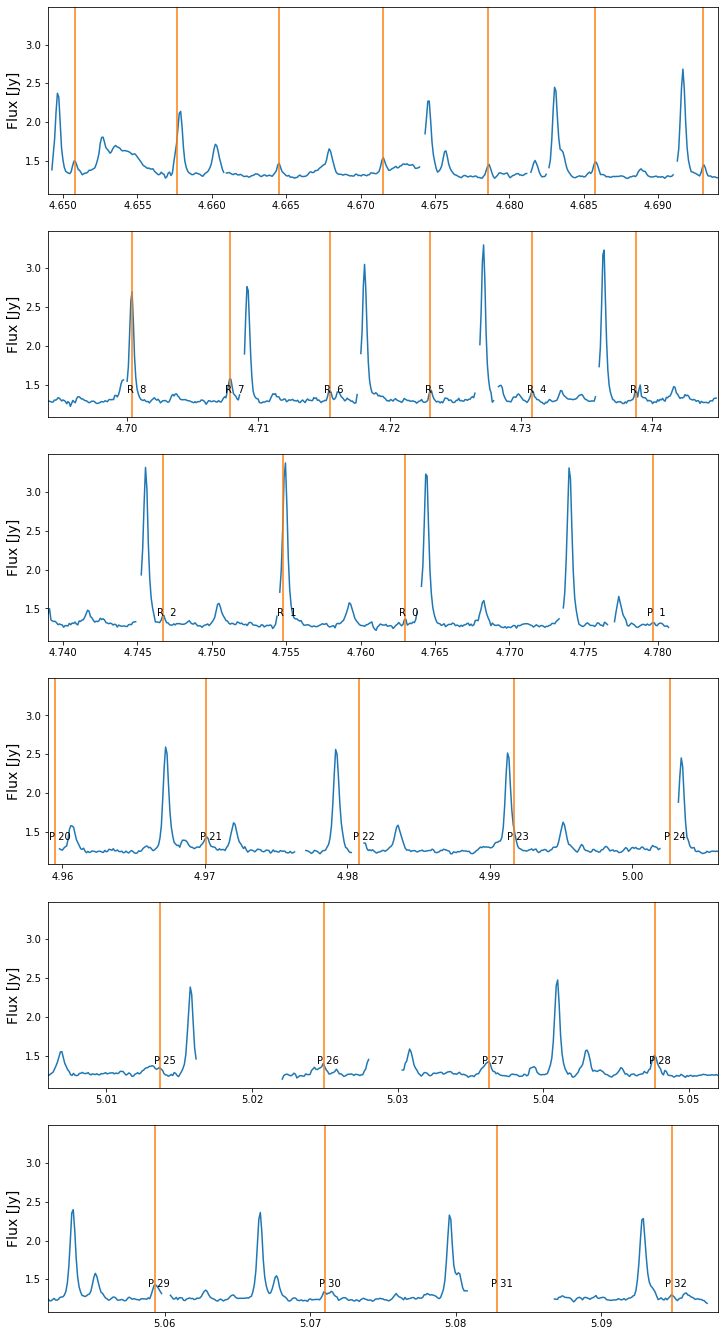

In [51]:
figa=plt.figure(figsize=(12,24))

axa1=figa.add_subplot(611)
axa1.plot(wave,flux)
axa1.set_xlim(4.649,4.694) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.649) & (mywave<4.694) ):
        axa1.axvline(mywave,color='C1')
        #axa1.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa1.set_ylabel('Flux [Jy]',fontsize=14)

axa2=figa.add_subplot(612)
axa2.plot(wave,flux)
axa2.set_xlim(4.694,4.745) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.694) & (mywave<4.745) ):
        axa2.axvline(mywave,color='C1')
        axa2.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa2.set_ylabel('Flux [Jy]',fontsize=14)

axa3=figa.add_subplot(613)
axa3.plot(wave,flux)
axa3.set_xlim(4.739,4.784) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.739) & (mywave<4.784) ):
        axa3.axvline(mywave,color='C1')
        axa3.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa3.set_ylabel('Flux [Jy]',fontsize=14)

axa4=figa.add_subplot(614)
axa4.plot(wave,flux)
axa4.set_xlim(4.959,5.006) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>4.959) & (mywave<5.006) ):
        axa4.axvline(mywave,color='C1')
        axa4.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa4.set_ylabel('Flux [Jy]',fontsize=14)

axa5=figa.add_subplot(615)
axa5.plot(wave,flux)
axa5.set_xlim(5.006,5.052) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>5.006) & (mywave<5.052) ):
        axa5.axvline(mywave,color='C1')
        axa5.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa5.set_ylabel('Flux [Jy]',fontsize=14)

axa6=figa.add_subplot(616)
axa6.plot(wave,flux)
axa6.set_xlim(5.052,5.098) #first half of wavelength range 
for i,mywave in enumerate(wave_test):
    if( (mywave>5.052) & (mywave<5.098) ):
        axa6.axvline(mywave,color='C1')
        axa6.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
axa6.set_ylabel('Flux [Jy]',fontsize=14)

Lines to fit: 
P32 //
P30 //
P28 //
P27 //
P21 //
P35 //
R2 (near 12CO) //
R5 //
R9 //
R10 //
R11 //
R12 //
R13 //
R15 //


Maybe:
P29 (partial data) //
P26 (weird shape) //
P25 (double peak, small signal?) //
R0 (near 12CO) //
R2 (near 12CO) //
R3 (double peak) //
R4 (no strong signal) //
R6 (two close peaks) //
R7 (near 12CO) //


Bad Lines:
P31 (no data) //
P24 (no data) //
P23 (near 12CO) //
P22 (no data) //
P1 (small signal) //
R1 (near 12CO/no data) //
R8 (near 12CO) //
R14 (near 12CO) //

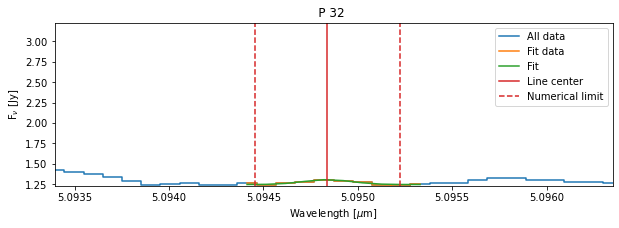

Is this fit okay? [y or n]y
Not enough data near  5.082863991757915  microns. Skipping.


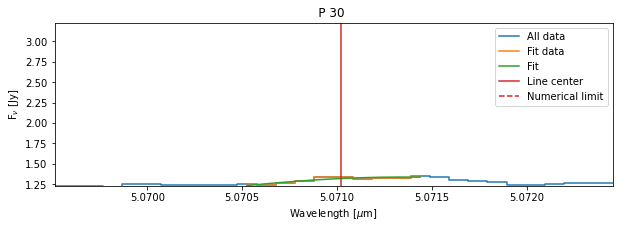

Is this fit okay? [y or n]n


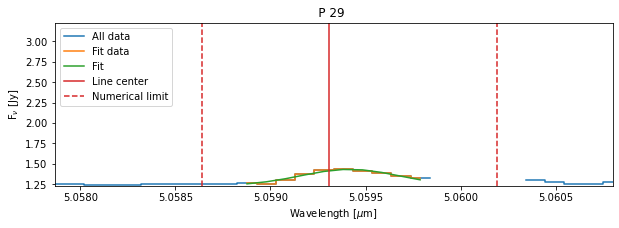

Is this fit okay? [y or n]y


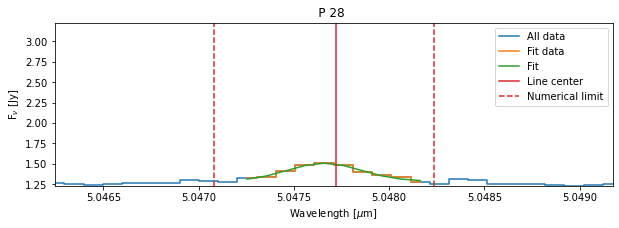

Is this fit okay? [y or n]n


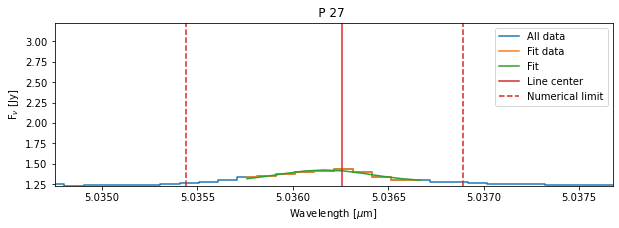

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


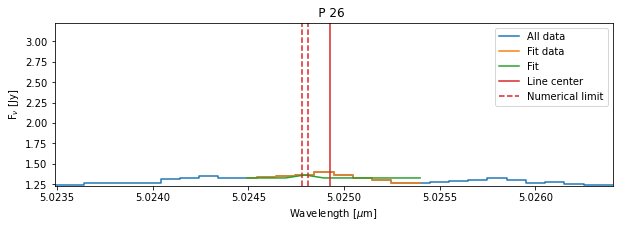

Is this fit okay? [y or n]n


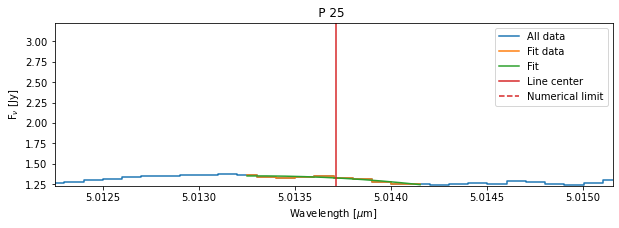

Is this fit okay? [y or n]n
Not enough data near  5.002625843846637  microns. Skipping.


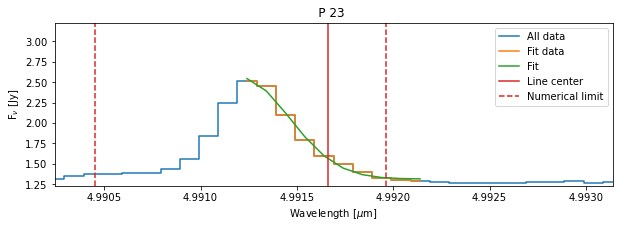

Is this fit okay? [y or n]n
Not enough data near  4.9808172357038645  microns. Skipping.


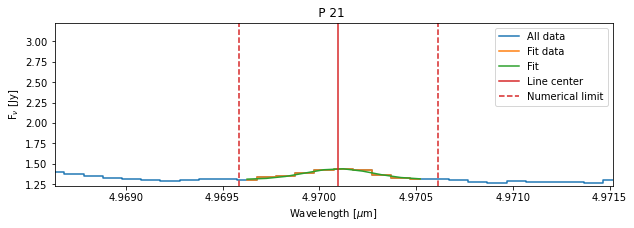

Is this fit okay? [y or n]n
Not enough data near  4.959491228615943  microns. Skipping.
Not enough data near  4.949006577635733  microns. Skipping.
Not enough data near  4.938639715648158  microns. Skipping.
Not enough data near  4.928389688896195  microns. Skipping.
Not enough data near  4.918256020501332  microns. Skipping.
Not enough data near  4.908237279828028  microns. Skipping.
Not enough data near  4.898332989997773  microns. Skipping.
Not enough data near  4.888542674132052  microns. Skipping.
Not enough data near  4.878864424716816  microns. Skipping.
Not enough data near  4.86929919550909  microns. Skipping.
Not enough data near  4.859844125237797  microns. Skipping.
Not enough data near  4.850499690781451  microns. Skipping.
Not enough data near  4.841265892140051  microns. Skipping.
Not enough data near  4.83213986804252  microns. Skipping.
Not enough data near  4.823122572245886  microns. Skipping.
Not enough data near  4.814213050993121  microns. Skipping.
Not enough dat

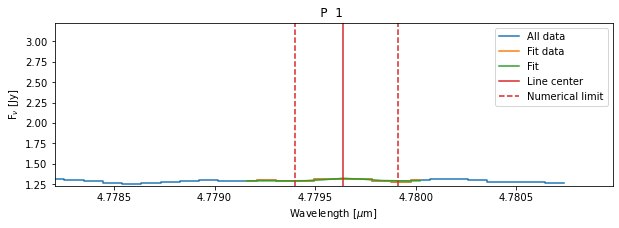

Is this fit okay? [y or n]n


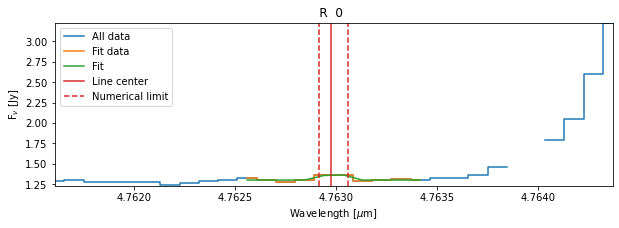

Is this fit okay? [y or n]y


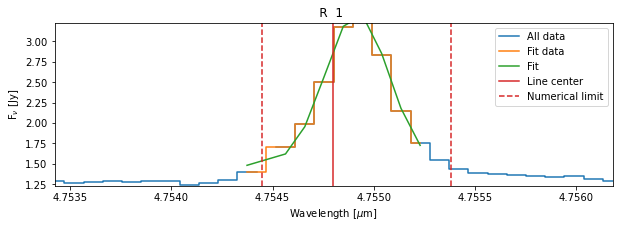

Is this fit okay? [y or n]n


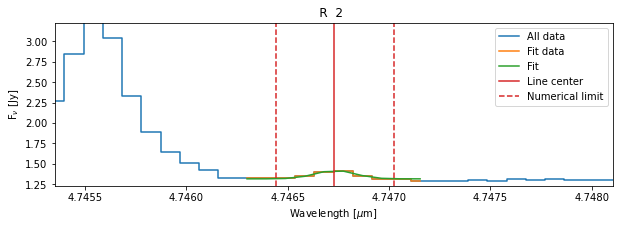

Is this fit okay? [y or n]y


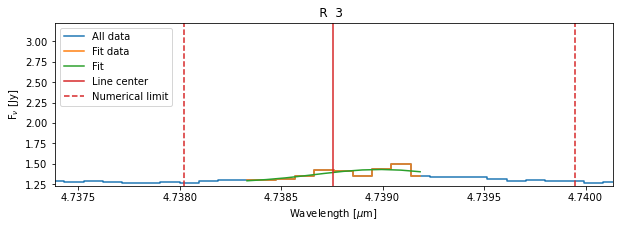

Is this fit okay? [y or n]n


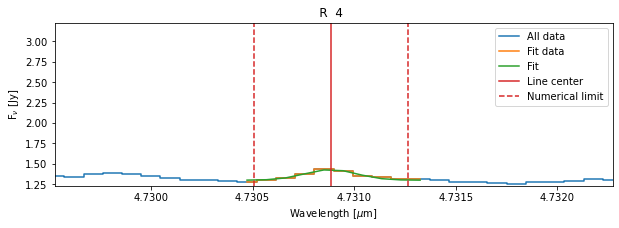

Is this fit okay? [y or n]y


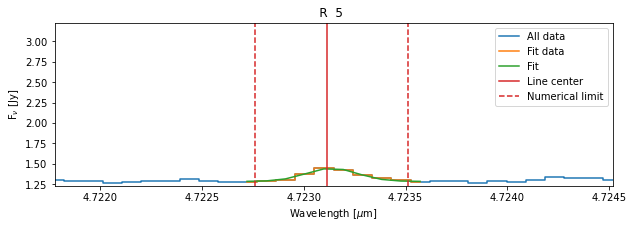

Is this fit okay? [y or n]y


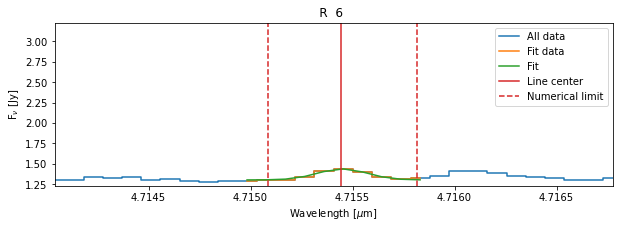

Is this fit okay? [y or n]y


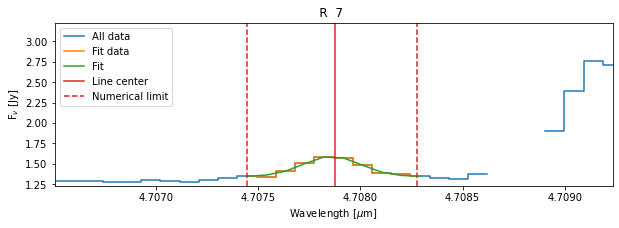

Is this fit okay? [y or n]n


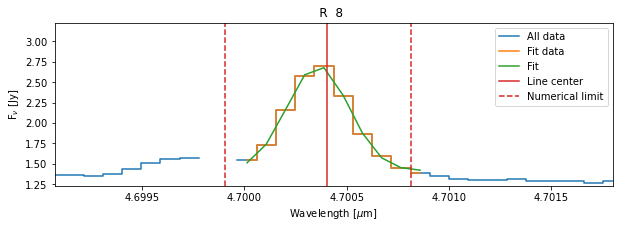

Is this fit okay? [y or n]n


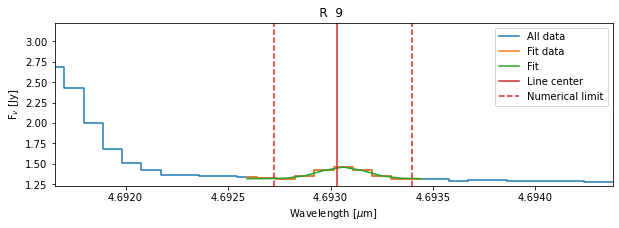

Is this fit okay? [y or n]y


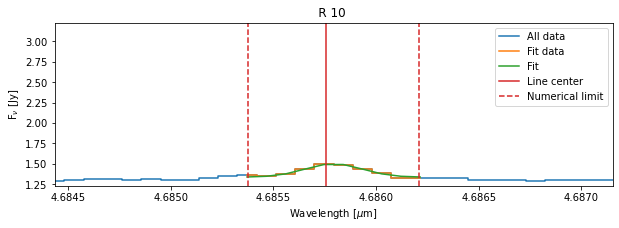

Is this fit okay? [y or n]n


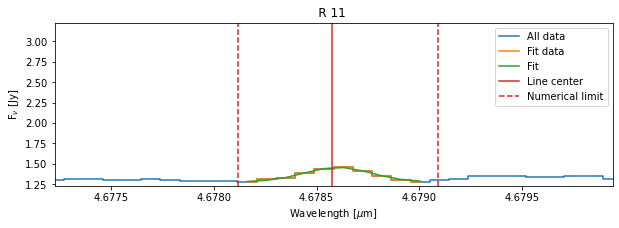

Is this fit okay? [y or n]y


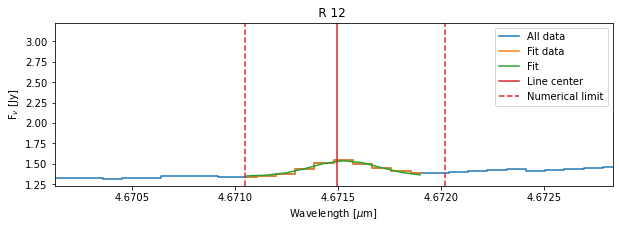

Is this fit okay? [y or n]y


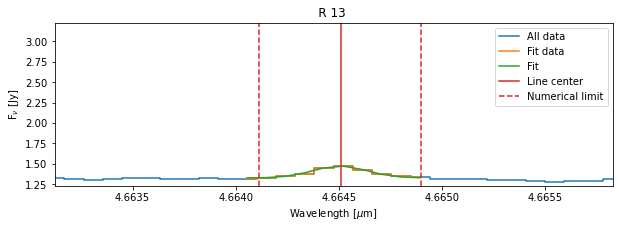

Is this fit okay? [y or n]y


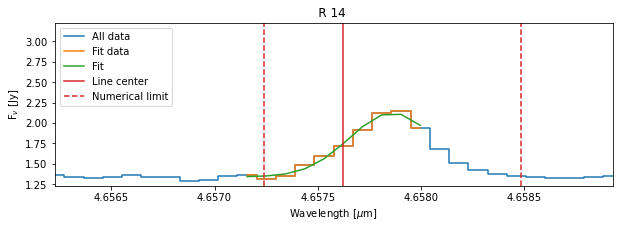

Is this fit okay? [y or n]n


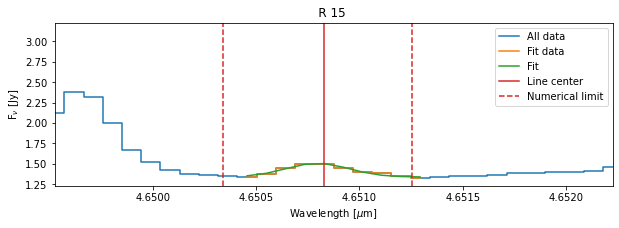

Is this fit okay? [y or n]y


In [8]:
#Calculate fluxes.
lineflux_data_co13_narrow=calc_fluxes(wave,flux,hitran_data, v_dop=26,fwhm_v=40.,sep_v=30.,cont=1.05,vet_fits=True, plot=True)

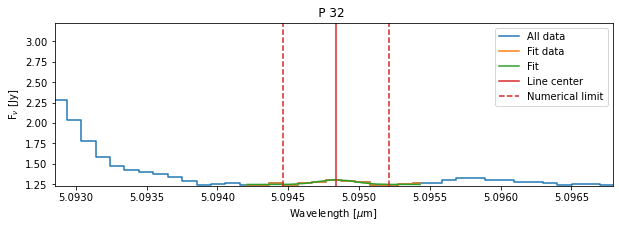

Is this fit okay? [y or n]n
Not enough data near  5.082863991757915  microns. Skipping.


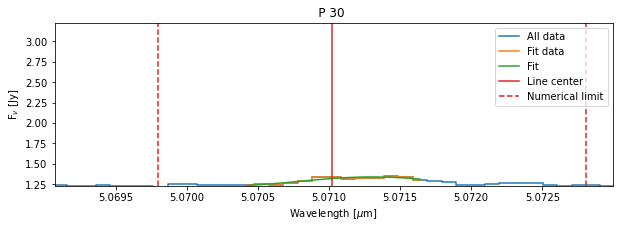

Is this fit okay? [y or n]n


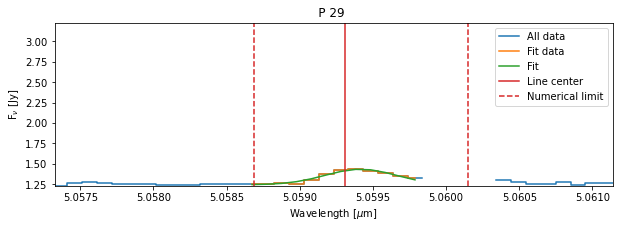

Is this fit okay? [y or n]n


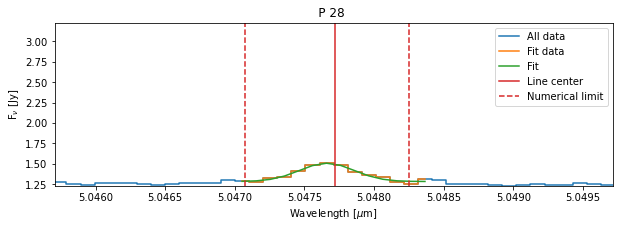

Is this fit okay? [y or n]y


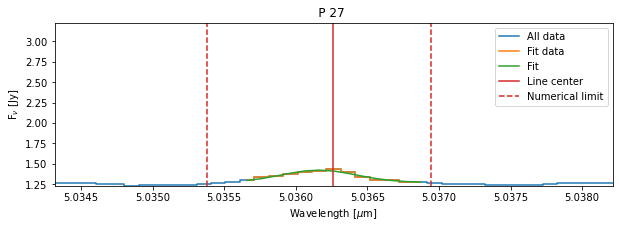

Is this fit okay? [y or n]n


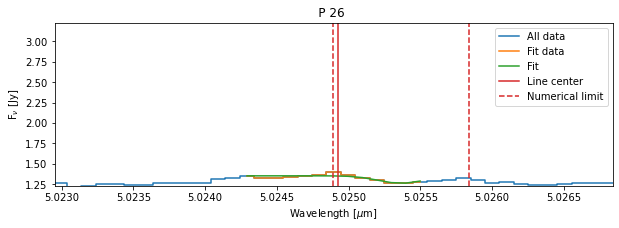

Is this fit okay? [y or n]n


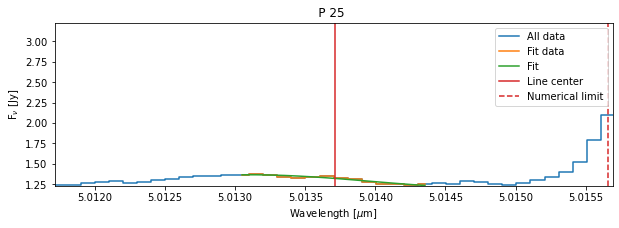

Is this fit okay? [y or n]n
Not enough data near  5.002625843846637  microns. Skipping.


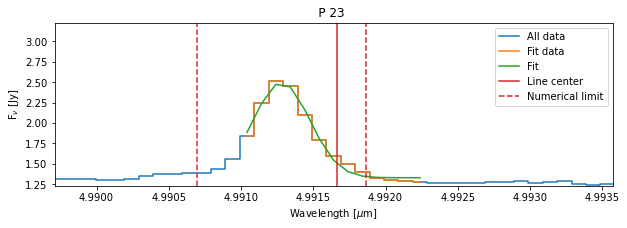

Is this fit okay? [y or n]n


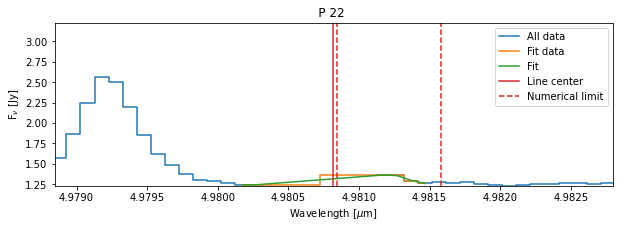

Is this fit okay? [y or n]n


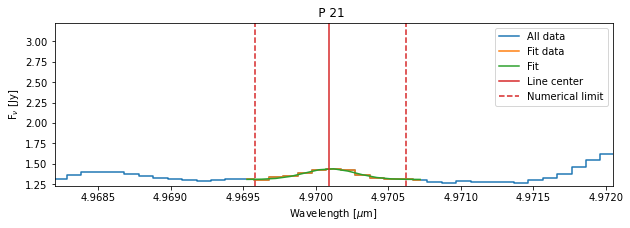

Is this fit okay? [y or n]y
Not enough data near  4.959491228615943  microns. Skipping.
Not enough data near  4.949006577635733  microns. Skipping.
Not enough data near  4.938639715648158  microns. Skipping.
Not enough data near  4.928389688896195  microns. Skipping.
Not enough data near  4.918256020501332  microns. Skipping.
Not enough data near  4.908237279828028  microns. Skipping.
Not enough data near  4.898332989997773  microns. Skipping.
Not enough data near  4.888542674132052  microns. Skipping.
Not enough data near  4.878864424716816  microns. Skipping.
Not enough data near  4.86929919550909  microns. Skipping.
Not enough data near  4.859844125237797  microns. Skipping.
Not enough data near  4.850499690781451  microns. Skipping.
Not enough data near  4.841265892140051  microns. Skipping.
Not enough data near  4.83213986804252  microns. Skipping.
Not enough data near  4.823122572245886  microns. Skipping.
Not enough data near  4.814213050993121  microns. Skipping.
Not enough dat

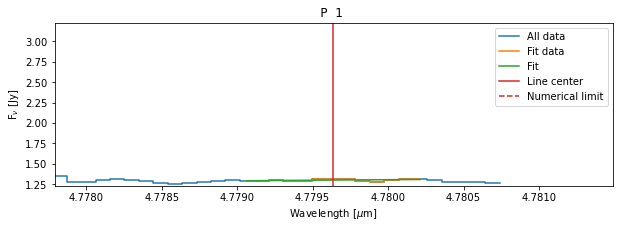

Is this fit okay? [y or n]n


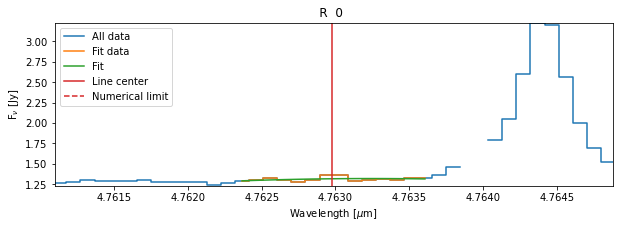

Is this fit okay? [y or n]n


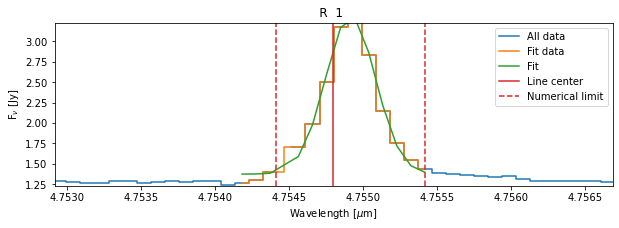

Is this fit okay? [y or n]n


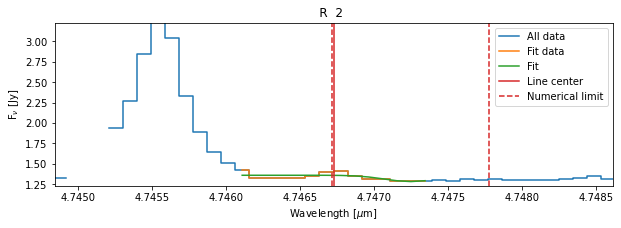

Is this fit okay? [y or n]n


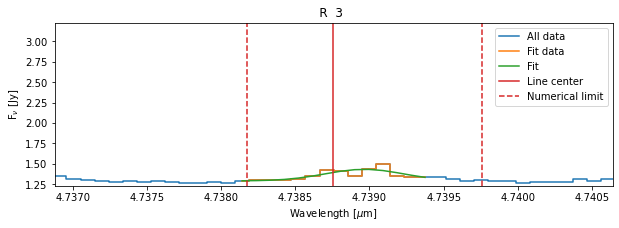

Is this fit okay? [y or n]n


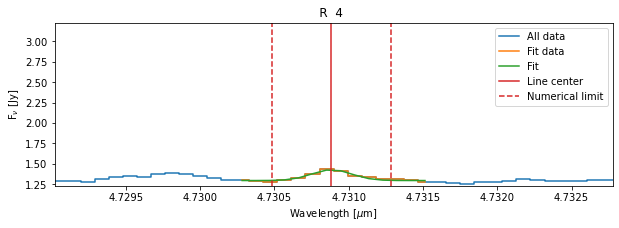

Is this fit okay? [y or n]n


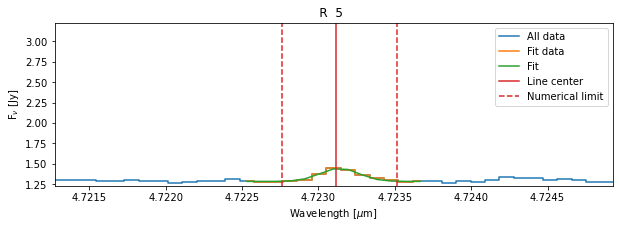

Is this fit okay? [y or n]n


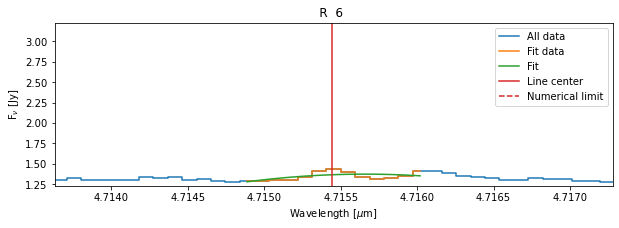

Is this fit okay? [y or n]n


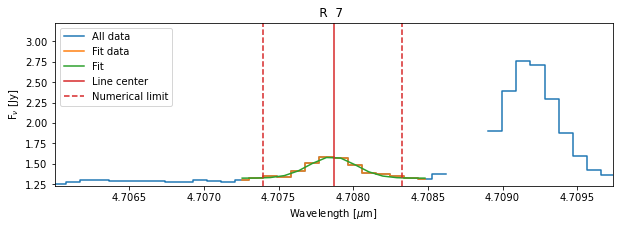

Is this fit okay? [y or n]y


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


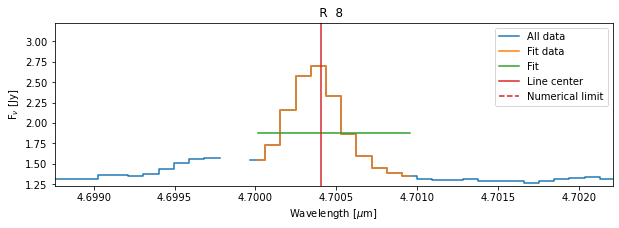

Is this fit okay? [y or n]n


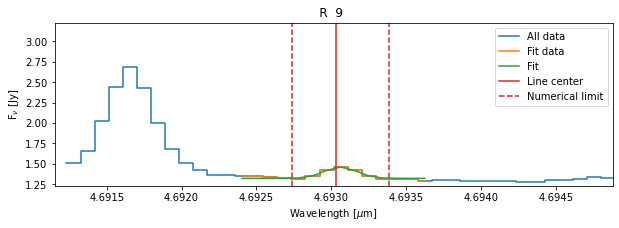

Is this fit okay? [y or n]n


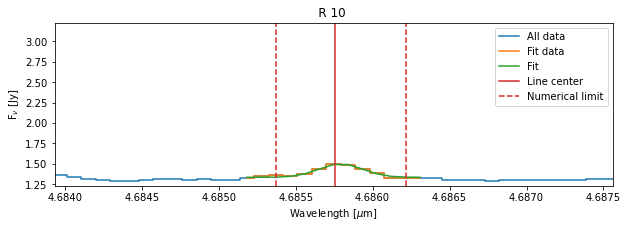

Is this fit okay? [y or n]y


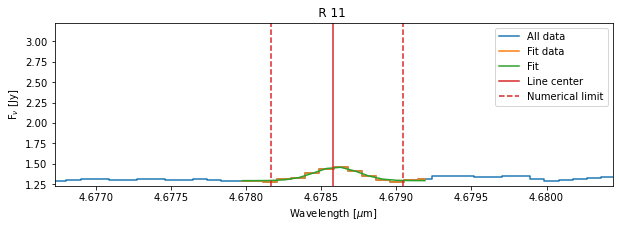

Is this fit okay? [y or n]n


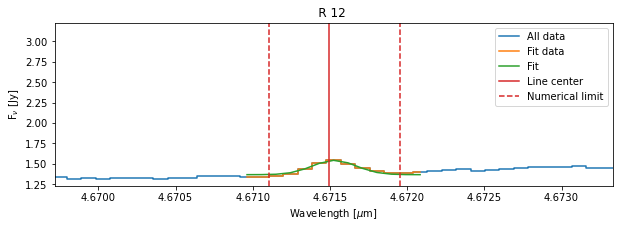

Is this fit okay? [y or n]n


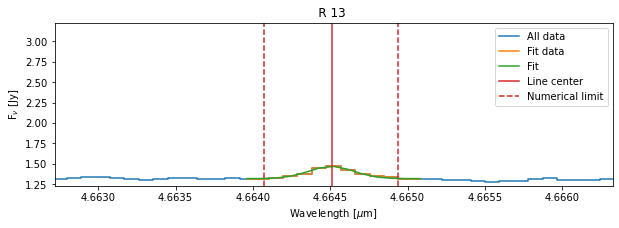

Is this fit okay? [y or n]n


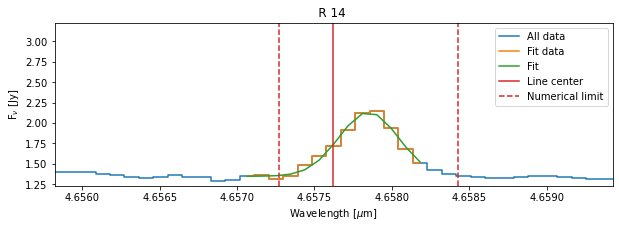

Is this fit okay? [y or n]n


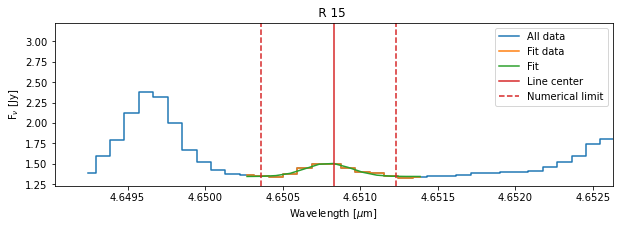

Is this fit okay? [y or n]n


In [9]:
#Calculate fluxes.
lineflux_data_co13_medium=calc_fluxes(wave,flux,hitran_data, v_dop=26,fwhm_v=40.,sep_v=40.,cont=1.05,vet_fits=True, plot=True)

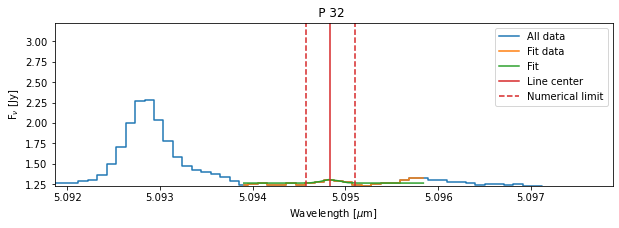

Is this fit okay? [y or n]n
Not enough data near  5.082863991757915  microns. Skipping.


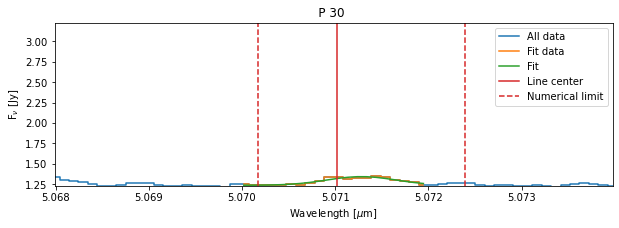

Is this fit okay? [y or n]y


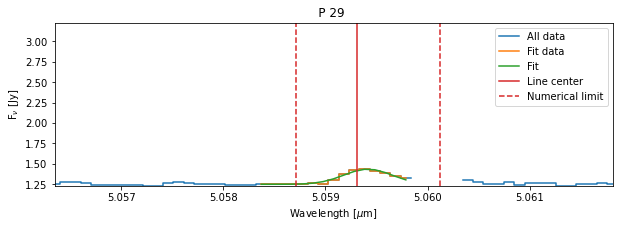

Is this fit okay? [y or n]n


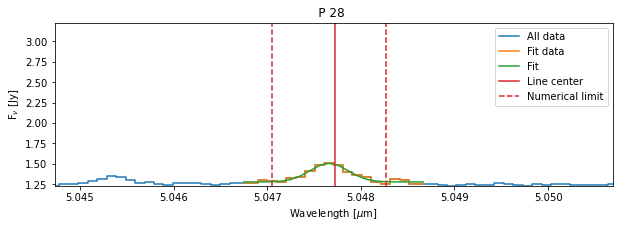

Is this fit okay? [y or n]n


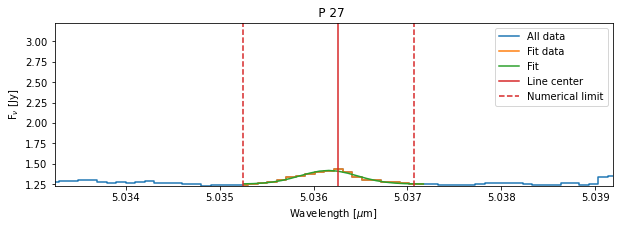

Is this fit okay? [y or n]y


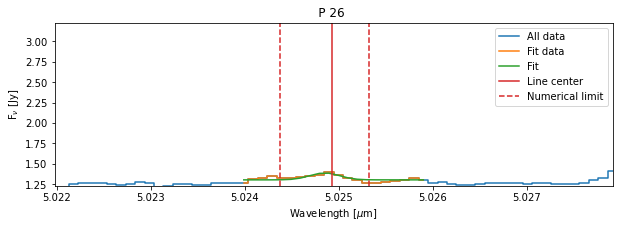

Is this fit okay? [y or n]n


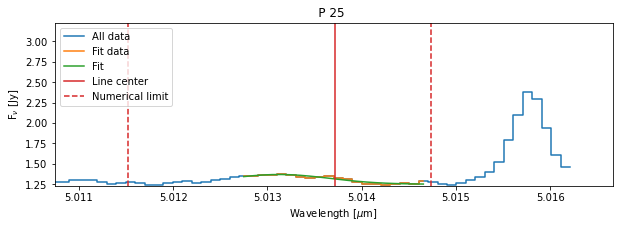

Is this fit okay? [y or n]n


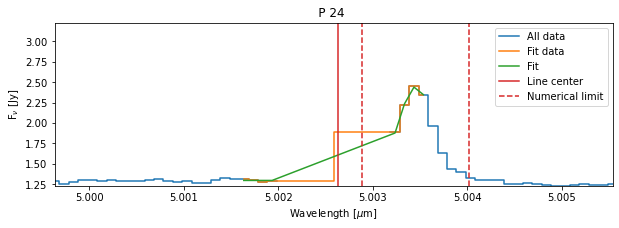

Is this fit okay? [y or n]n


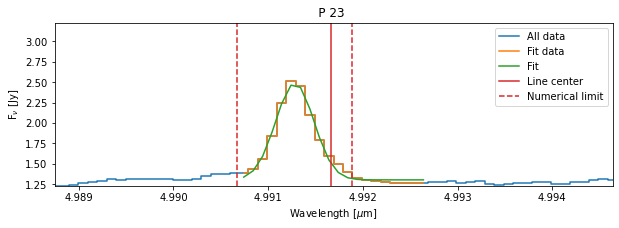

Is this fit okay? [y or n]n


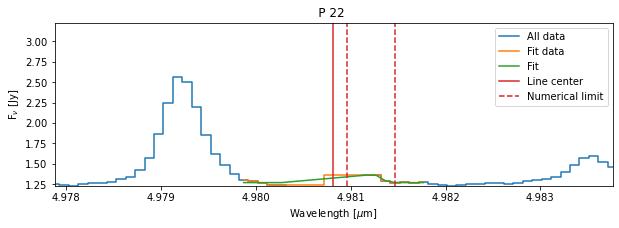

Is this fit okay? [y or n]n


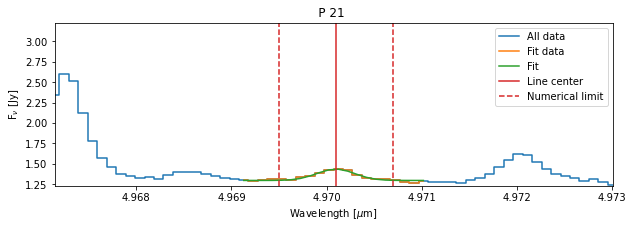

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


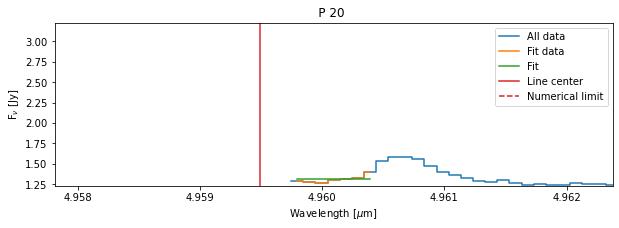

Is this fit okay? [y or n]n
Not enough data near  4.949006577635733  microns. Skipping.
Not enough data near  4.938639715648158  microns. Skipping.
Not enough data near  4.928389688896195  microns. Skipping.
Not enough data near  4.918256020501332  microns. Skipping.
Not enough data near  4.908237279828028  microns. Skipping.
Not enough data near  4.898332989997773  microns. Skipping.
Not enough data near  4.888542674132052  microns. Skipping.
Not enough data near  4.878864424716816  microns. Skipping.
Not enough data near  4.86929919550909  microns. Skipping.
Not enough data near  4.859844125237797  microns. Skipping.
Not enough data near  4.850499690781451  microns. Skipping.
Not enough data near  4.841265892140051  microns. Skipping.
Not enough data near  4.83213986804252  microns. Skipping.
Not enough data near  4.823122572245886  microns. Skipping.
Not enough data near  4.814213050993121  microns. Skipping.
Not enough data near  4.805410350527201  microns. Skipping.
Not enough dat

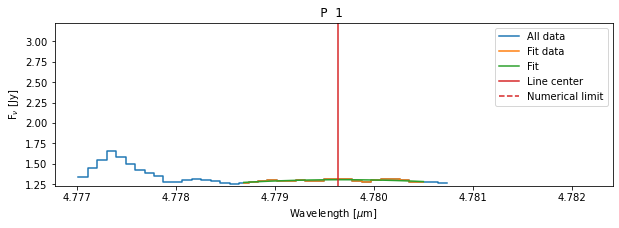

Is this fit okay? [y or n]n


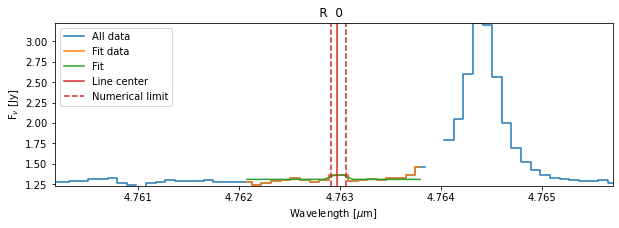

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


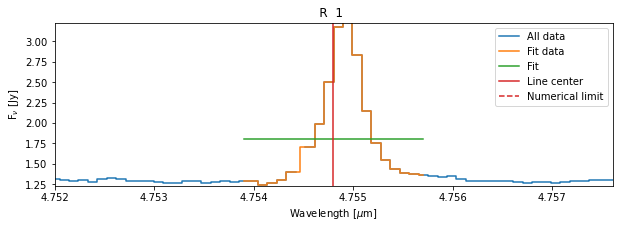

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:154: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(fitcovariance))


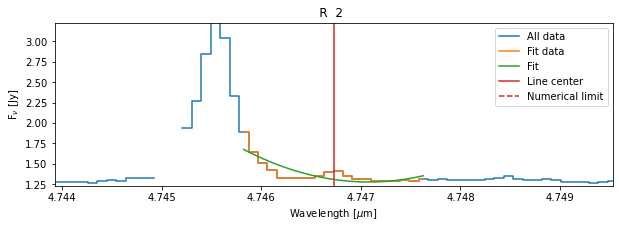

Is this fit okay? [y or n]n


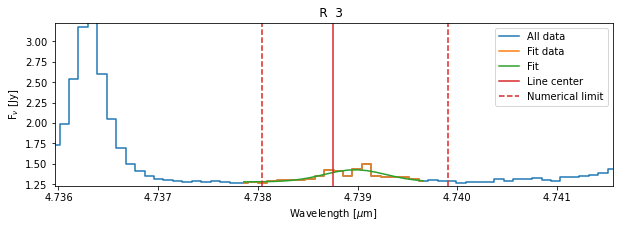

Is this fit okay? [y or n]n


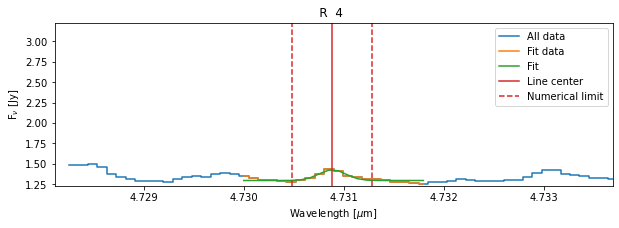

Is this fit okay? [y or n]n


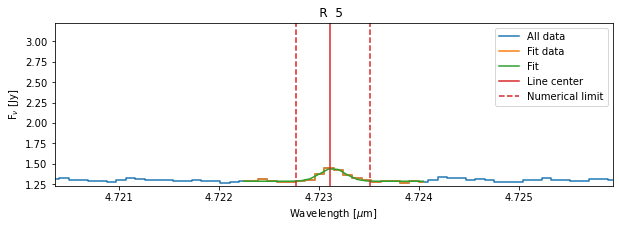

Is this fit okay? [y or n]n


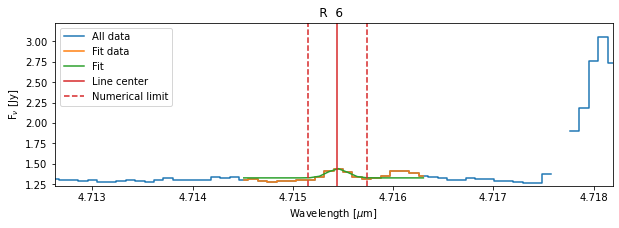

Is this fit okay? [y or n]n


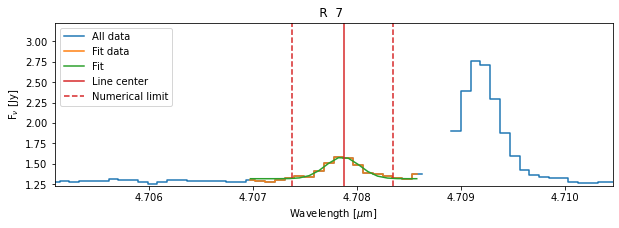

Is this fit okay? [y or n]n


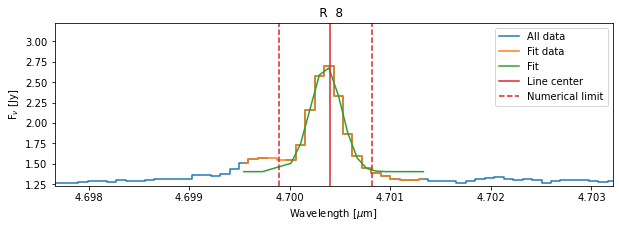

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


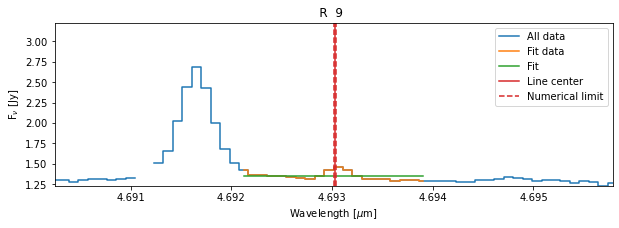

Is this fit okay? [y or n]n


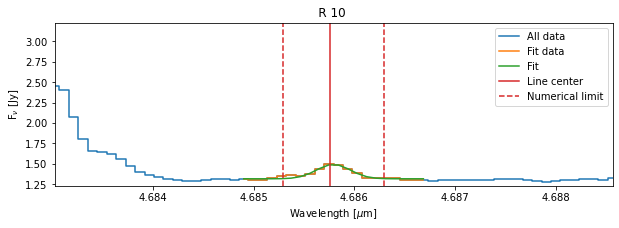

Is this fit okay? [y or n]n


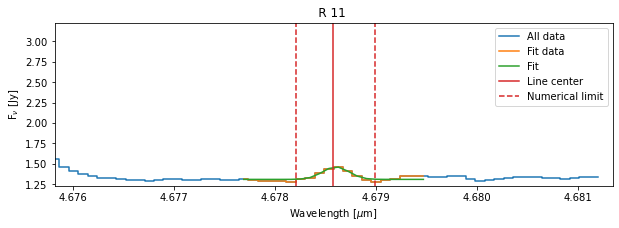

Is this fit okay? [y or n]n


C:\Users\ksn70\python\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ksn70\python\lib\site-packages\spectools_ir\flux_calculator\helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


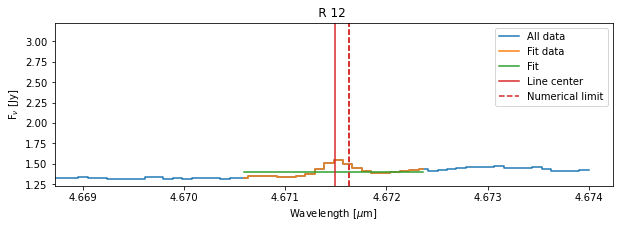

Is this fit okay? [y or n]n


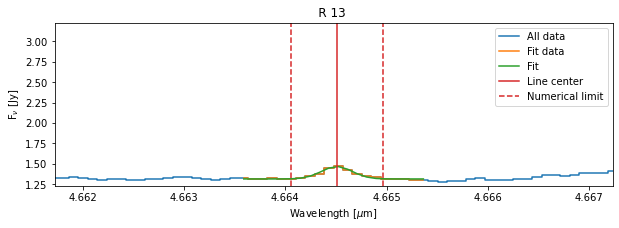

Is this fit okay? [y or n]n


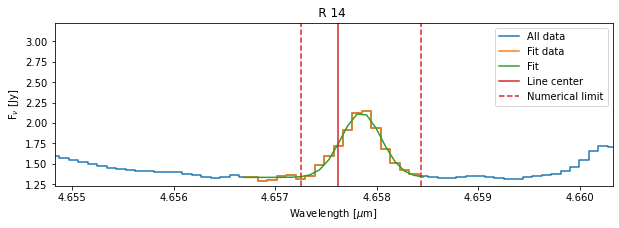

Is this fit okay? [y or n]n


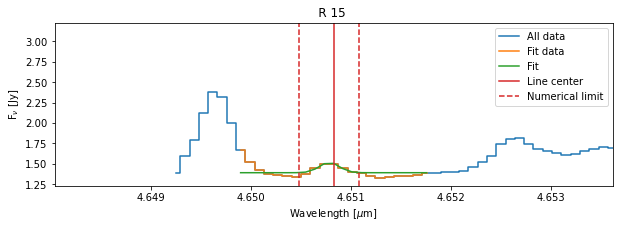

Is this fit okay? [y or n]n


In [10]:
#Calculate fluxes.
lineflux_data_co13_wide=calc_fluxes(wave,flux,hitran_data, v_dop=26,fwhm_v=40.,sep_v=60.,cont=1.05,vet_fits=True, plot=True)

Lines fit with narrow: P32 P29 R0 R2 R4 R5 R6 R9 R11 R12 R13 R15

Lines fit with medium: P28 P21 R7 R10

Lines fit with wide: P30 P27

Not fit: P31 P26 P25 P24 P23 P22 P1 R1 R3 R8 R14

In [10]:
#lineflux_data_co13 = vstack([lineflux_data_co13_narrow, lineflux_data_co13_medium, lineflux_data_co13_wide])
#pickle.dump(lineflux_data_co13,open('lineflux_data_co13.p','wb')) #save for convenience

lineflux_data_co13=pickle.load(open('lineflux_data_co13.p','rb'))  #restore lineflux_data if you don't want to re-run

In [41]:
lineflux_data_co13

molec_id,local_iso_id,wn,a,elower,Vp_HITRAN,Vpp_HITRAN,Qp_HITRAN,Qpp_HITRAN,gup,glow,nu,eup_k,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
,,,,,,,,,,,,,,W / m2,,W / m2,km / s,km / s,km / s,km / s,Jy,Jy
int32,int32,float32,float32,float32,bytes15,bytes15,bytes15,bytes15,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,2,1962.9417,13.35,1934.6669,1,0,,P 32,126.0,130.0,58847510000000.0,5607.7886,5.094395,2.1182667988097175e-18,2.206619187210305e-18,3.125080531694677e-19,17.677565206739473,3.9534064465877914,26.10574826405937,1.3040941014282086,1.2440581840881553,0.005964608320408674
5,2,1976.7268,13.64,1594.8053,1,0,,P 29,114.0,118.0,59260780000000.0,5138.6377,5.058868,1.4268889101640386e-17,1.5197916276284872e-17,1.077795424137603e-18,36.05043009134295,7.090996293541298,32.54857477613644,0.9979627900298755,1.2301250347109352,0.03711965351547441
5,2,2099.7102,10.71,0.0,1,0,,R 0,6.0,2.0,62947730000000.0,3021.0142,4.762562,1.488062557218742e-18,3.1909290256872353e-18,9.09758785932322e-20,3.609140744492358,108074.78936089038,26.83360507168028,2762.2033630848205,1.2991609637357109,0.0059280496914289665
5,2,2106.8977,13.92,11.0276,1,0,,R 2,14.0,10.0,63163207000000.0,3047.222,4.746315,3.313731159630692e-18,3.3420165344171994e-18,2.8643547302079895e-19,14.465056513366353,1.99805701536382,26.476408781123776,0.7129504783486144,1.3137717555223707,0.005351397982038798
5,2,2113.9531,14.92,36.7572,1,0,,R 4,22.0,18.0,63374720000000.0,3094.3916,4.730474,5.66584882286252e-18,5.520115896173851e-18,5.00027106215712e-19,18.85893129718034,2.7219083392888606,26.034857139070446,0.8612755949312847,1.2974260639994704,0.008903547197679652
5,2,2117.4307,15.23,55.1341,1,0,,R 5,26.0,22.0,63478975000000.0,3125.8354,4.722705,6.885466312571732e-18,6.79473860410061e-18,3.308708282497785e-19,18.72164570868638,1.4510420336758603,27.50652446651522,0.46104677442407355,1.2825629497223612,0.0058741144705757534
5,2,2120.8748,15.47,77.185,1,0,,R 6,30.0,26.0,63582226000000.0,3162.5176,4.7150354,5.418379436671563e-18,5.561043011123766e-18,3.584932647381712e-19,18.188058301575758,1.8538003947089696,26.37577994096064,0.6019148015469249,1.3005506167607357,0.0063245956921207215
5,2,2131.0046,16.03,165.3722,1,0,,R 9,42.0,38.0,63885915000000.0,3303.9736,4.692622,5.216511695067806e-18,5.419371537140214e-18,2.9985573349152355e-19,16.787516048323823,1.4630487632374,28.047827885335817,0.4961821712416941,1.3158974314319387,0.005295449652345208


## Numerical and Gaussian calculations for fits

Text(0, 0.5, 'Line flux [10$^{-16}$ W m$^{-2}$]')

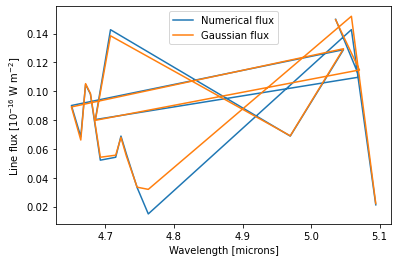

In [42]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineflux_data_co13['wave'],lineflux_data_co13['lineflux']*1e16, label='Numerical flux')
ax1.plot(lineflux_data_co13['wave'],lineflux_data_co13['lineflux_Gaussian']*1e16 ,label='Gaussian flux')
ax1.legend()
ax1.set_xlabel('Wavelength [microns]')
ax1.set_ylabel(r'Line flux [10$^{-16}$ W m$^{-2}$]')

### Creating "composite lineshape" with info from flux_calculator output

In [43]:
lineshape_data=make_lineshape(wave,flux,lineflux_data_co13)

Text(0, 0.5, 'Arbitrary flux')

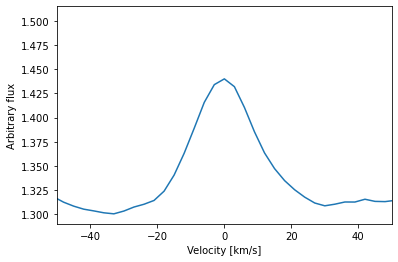

In [44]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineshape_data[0],lineshape_data[1])

plt.xlim([-50,50])
ax1.set_xlabel('Velocity [km/s]')
ax1.set_ylabel('Arbitrary flux')

### "Display resultant fluxes in a rotation diagram"

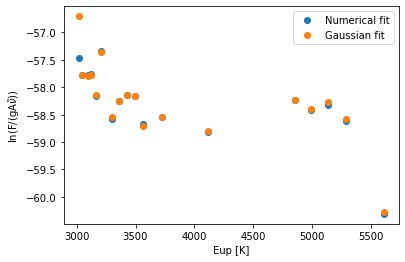

In [45]:
rot_numerical=make_rotation_diagram(lineflux_data_co13,fluxkey='lineflux')
rot_Gaussian=make_rotation_diagram(lineflux_data_co13,fluxkey='lineflux_Gaussian')

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rot_numerical['x'],rot_numerical['y'],'C0o',label='Numerical fit')
ax1.plot(rot_Gaussian['x'],rot_Gaussian['y'],'C1o', label='Gaussian fit')

ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.legend()

### Slabspec Part 1

compare data with slabspec model which uses my best fit parameters

In [7]:
logomega=-16.292 #omega=area/(d_pc*pc.value)**2.
omega=10**logomega
distance=140 #pc, Salyk et al. 2008
Area=omega*(distance*pc.value)**2
print(Area)

#Make slab model
#This can take a few seconds to run.  It is primarily limited by the convolution time.
model_output=make_spec('CO',1.5e21,1357.507,Area,wmin=4.58,wmax=5.2,convol_fwhm=30.,d_pc=140.,res=1e-5,vup=1)

9.527021861798965e+20


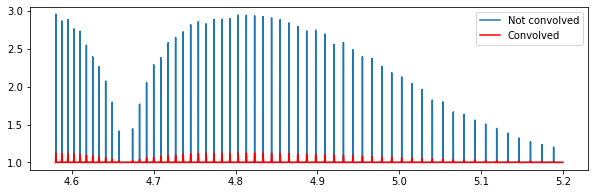

In [8]:
#Plot slab model
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='Not convolved')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'r',label='Convolved')
ax1.legend()

In [11]:
#outpus as rotation diagram
rd_model=make_rotation_diagram(model_output['lineparams'])
rd_data=make_rotation_diagram(lineflux_data_co13)

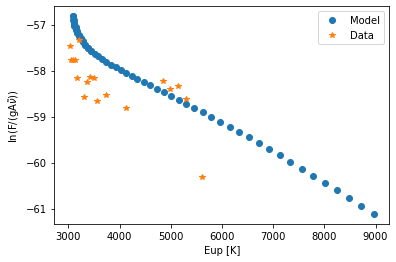

In [12]:
#plot rotation diagram
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rd_model['x'],rd_model['y'],' C0o',label='Model')
ax1.plot(rd_data['x'],rd_data['y'],' C1*',label='Data')
ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
#ax1.set_xlim(3000,4700)
#ax1.set_ylim(-57,-52.5)
ax1.legend()

### Slabspec Part 2

Plot my 13CO data with a model using my 12CO values, except 1/60 the molecular population of 12CO, which is roughly what we would expect my 13CO population to be

In [13]:
logomega_12CO=-15.427 ##for 12CO disk fit
omega_12CO=10**logomega_12CO
distance=140 #pc, Salyk et al. 2008
Area_12CO=omega_12CO*(distance*pc.value)**2 #omega=area/(d_pc*pc.value)**2
logn=21.709 #for 12CO disk fit
n=(10**logn)/60 #assuming n12CO=60*n13CO
T=1455.859 #for 12CO disk fit
print(n,Area)

8.528030592338456e+19 9.527021861798965e+20


In [14]:
#Make slab model
#This can take a few seconds to run.  It is primarily limited by the convolution time.
model_output_12CO=make_spec('CO',n,1455.859,Area_12CO, wmin=4.64,wmax=5.1,isotopologue_number=2,convol_fwhm=30.,d_pc=140.,res=1e-5,vup=1)

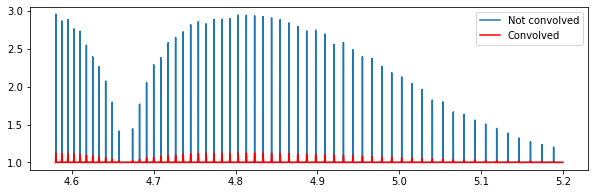

In [15]:
#Plot slab model
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='Not convolved')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'r',label='Convolved')
ax1.legend()

In [16]:
#Output model as rotation diagram
rd_model_12CO=make_rotation_diagram(model_output_12CO['lineparams'])
rd_data=make_rotation_diagram(lineflux_data_co13)

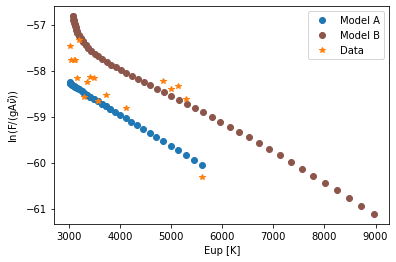

In [21]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rd_model_12CO['x'],rd_model_12CO['y'],' C0o',label='Model A')
ax1.plot(rd_model['x'],rd_model['y'],' C5o',label='Model B')
ax1.plot(rd_data['x'],rd_data['y'],' C1*',label='Data')
ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
#ax1.set_xlim(3000,4700)
#ax1.set_ylim(-57,-60)
ax1.legend()

### Slab_fitter

In [25]:
myconfig=Config('C:\\Users\\ksn70\\mypy\\configdr_tau_13.json')  #reads config.json by default, or can specify path to file as input parameter
myconfig.display()

data=lineflux_data_co13

mydata=LineData(data)
myretrieval=Retrieval(myconfig,mydata)

{
 "tmin": 1200,
 "tmax": 1600,
 "lognmin": 20,
 "lognmax": 22.5,
 "logomegamin": -17.5,
 "logomegamax": -16,
 "Nwalkers": 20,
 "Nburnin": 1000,
 "Nsamples": 3000
}


### Run Retrieval

In [26]:
#mychain_co13=myretrieval.run_emcee()  #Run retrieval.  May take a while, depending on number of samples
#pickle.dump(mychain_co13,open('test_chain.p','wb'))  #Save for convenience and later retrieval
#os.system('afplay /System/Library/Sounds/Sosumi.aiff')

mychain_co13=pickle.load(open('test_chain.p','rb'))  
postsamples=get_samples(mychain_co13,myconfig.getpar('Nburnin'))  #Get list of samples, after removing burnin, from chain

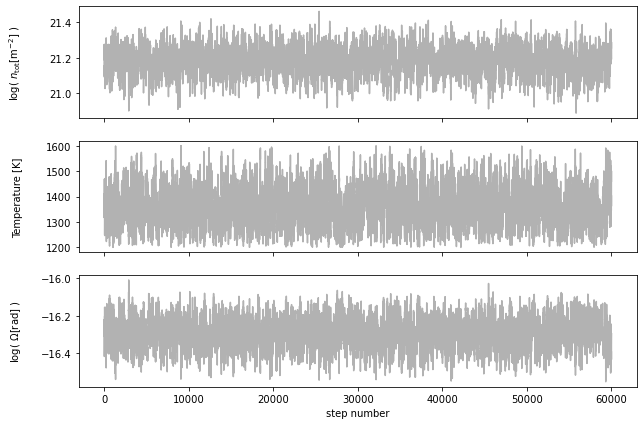

In [27]:
#Trace plot - examine samples
trace_plot(postsamples)

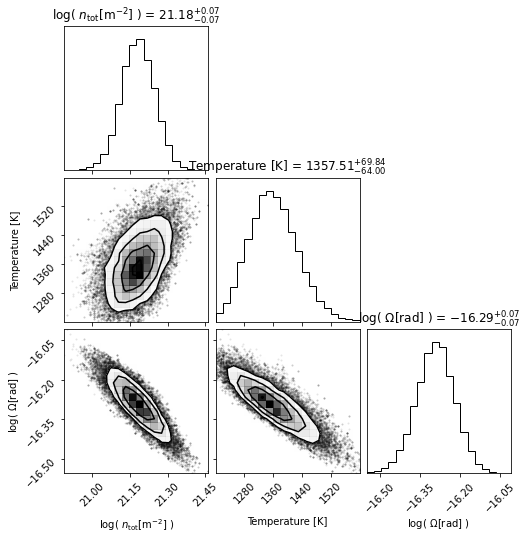

In [28]:
#Corner plot - see posterior distributions
fig=corner_plot(postsamples)

In [29]:
#Best fit parameters - best fit parameters plus/minus 1-sigma intervals
best_fit=find_best_fit(postsamples,show=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

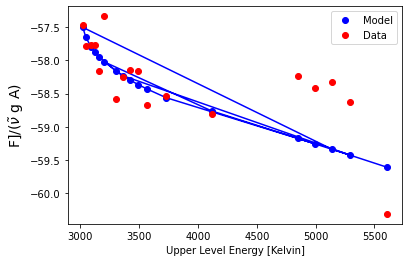

In [30]:
#Rotation diagram
modelflux=compute_model_fluxes(mydata,postsamples) #Compute model fluxes for ecah line in data
rotdiag=mydata.rot_diagram(modelfluxes=modelflux,units='mks') #Rotation diagram for data and model

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rotdiag['x'],rotdiag['modely'],'bo',label='Model')
ax1.plot(rotdiag['x'],rotdiag['modely'],'b',label='_None_')
ax1.plot(rotdiag['x'],rotdiag['y'],'ro',label='Data')

ax1.set_xlabel('Upper Level Energy [Kelvin]')
#ax1.set_ylabel(r'F[W m$^{-2}$]/($\~{\nu}$ [m$^{-1}$]g A[s$^{-1}$])',fontsize=14)
ax1.set_ylabel(r'F]/($\~{\nu}$ g A)',fontsize=14)
ax1.legend()